In [1]:
from sklearn.decomposition import FastICA
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile as wav
#import IPython.display as ipd
#import sounddevice as sd


## Wiener deconvolution
https://en.wikipedia.org/wiki/Wiener_deconvolution

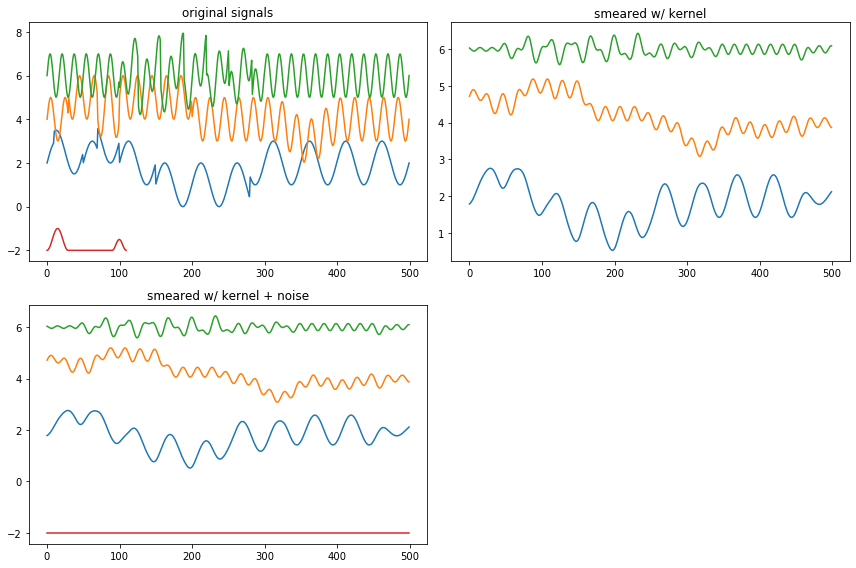

In [2]:
n = 500

t = np.linspace(0,10,n)

y1 = np.zeros_like(t)
y1[10:50]= 0.5
y1[70:100] = 1
y1[150:280] = -1
y1+= np.sin(2*np.pi*t)

y2 = np.zeros_like(t)
y2[30:200]= 1
y2[70:100] = signal.hann(30)
y2[310:410] = -signal.hann(100)
y2+= np.sin(5*np.pi*t)

y3 = np.zeros_like(t)
y3[100:300]= signal.sawtooth(t[100:300]*10)
y3+= np.sin(6*np.pi*t)

### conv. kernel
smear = np.hstack((signal.hann(30), np.zeros(60), 0.5*signal.hann(20)))


y1s = signal.convolve(y1, smear, mode='same') / sum(smear)
y2s = signal.convolve(y2, smear, mode='same') / sum(smear)
y3s = signal.convolve(y3, smear, mode='same') / sum(smear)




fig = plt.figure(figsize=(12, 8))  # Create figure and determine size
ax1 = plt.subplot(2, 2, 1)    # Create an elongated subplot using two grid indicies
ax2 = plt.subplot(2, 2, 2)         
ax3 = plt.subplot(2, 2, 3) 

ax1.plot(y1+2)
ax1.plot(y2+4)
ax1.plot(y3+6)
ax1.plot(smear - 2)
ax1.set_title('original signals')

ax2.plot(y1s+2)
ax2.plot(y2s+4)
ax2.plot(y3s+6)
ax2.set_title('smeared w/ kernel')

nA = 0
y1s += nA * np.random.normal(size=y1s.shape)
y2s += nA * np.random.normal(size=y2s.shape)
y3s += nA * np.random.normal(size=y3s.shape)
noise = nA * np.random.normal(size=y3s.shape)

ax3.plot(y1s+2)
ax3.plot(y2s+4)
ax3.plot(y3s+6)
ax3.plot(noise - 2)
ax3.set_title('smeared w/ kernel + noise')

plt.tight_layout()

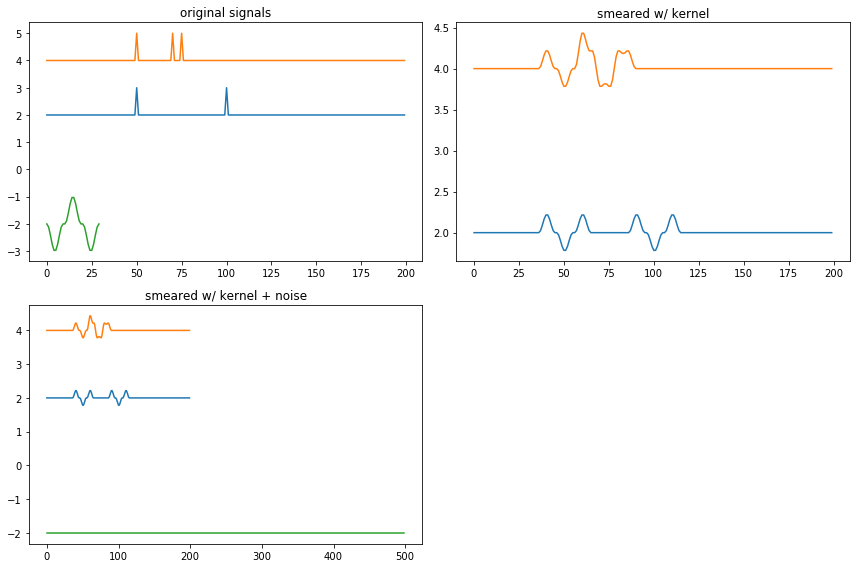

In [21]:
n = 200

t = np.linspace(0,10,n)

y1 = np.zeros_like(t)
y1[50] = 1
y1[100] = 1

y2 = np.zeros_like(t)
y2[50]= 1
y2[70] = 1
y2[75] = 1

### conv. kernel
smear = np.hstack((-signal.hann(10), signal.hann(10), -signal.hann(10)))


y1s = signal.convolve(y1, smear, mode='same') / sum(smear)
y2s = signal.convolve(y2, smear, mode='same') / sum(smear)

fig = plt.figure(figsize=(12, 8))  # Create figure and determine size
ax1 = plt.subplot(2, 2, 1)    # Create an elongated subplot using two grid indicies
ax2 = plt.subplot(2, 2, 2)         
ax3 = plt.subplot(2, 2, 3) 

ax1.plot(y1+2)
ax1.plot(y2+4)
ax1.plot(smear - 2)
ax1.set_title('original signals')

ax2.plot(y1s+2)
ax2.plot(y2s+4)
ax2.set_title('smeared w/ kernel')

nA = 0
y1s += nA * np.random.normal(size=y1s.shape)
y2s += nA * np.random.normal(size=y2s.shape)
noise = nA * np.random.normal(size=y3s.shape)

ax3.plot(y1s+2)
#ax3.plot(np.roll(y1s,10)+2)
ax3.plot(y2s+4)
ax3.plot(noise - 2)
ax3.set_title('smeared w/ kernel + noise')

plt.tight_layout()

In [23]:
#S = np.c_[y1s, y2s]
# plt.plot(np.flip(S,axis=0))

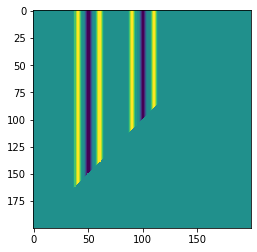

In [105]:
S = np.zeros((n,n))
#y1s1 = np.flip(y1s,axis=0)
for i in range(n):
    #S[i,i:] = y1s[0:n-i] #np.roll(y1s,-i)
    #S[i,0:n-i] = y1s[0:n-i]
    #S[i,i:] = y1s[i:] #np.roll(y1s,-i)
    #S[i,0:n-i] = y1s[i:]

    #S[i,0:i] = 0

plt.imshow(S)
#plt.plot(y1s)

In [98]:
#S = np.flip(S,axis=0)

ica = FastICA(whiten = True) #n_components=200, whiten = True) 
# whiten=True, fun='logcosh', exp, cube. max_iter, tol, w_init

Sica = ica.fit_transform(S)    # Reconstruct signals. 

#The pseudo-inverse of components_. It is the linear operator that maps independent sources to the data.
Aica = ica.mixing_             # Get estimated mixing matrix
# This is equal to the unmixing matrix when whiten is False, and equal to np.dot(unmixing_matrix, self.whitening_)
Unmixing = ica.components_ 
# Only if whiten is ‘True’. The pre-whitening matrix that projects data onto the first n_components PCs.
#Whiten = ica.whitening_


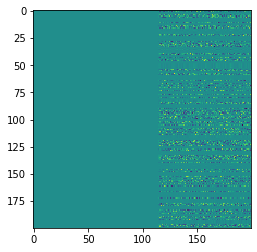

In [99]:
plt.imshow(Unmixing)

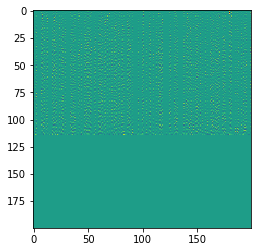

In [100]:
plt.imshow(Aica)

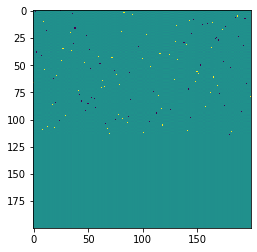

In [101]:
plt.imshow(Sica)


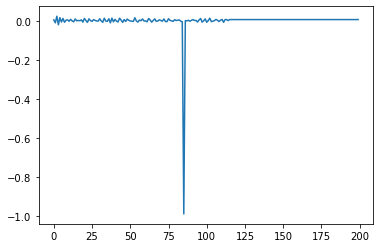

In [102]:
plt.plot(Sica[:,50])

In [103]:
n = 1000

t = np.linspace(0,10,n)
y = np.zeros_like(t)
y[10:50]= 0.5
y[70:100] = 1
y[150:280] = -1
y[[400, 410, 420, 430, 440, 450]] = 1
y[600:700] = 1
y[800:801] = 1

smear = np.zeros_like(t)
smear[10:110] = np.exp(-t[10:110])

y_conv = 

fig = plt.figure(figsize=(12, 8))  # Create figure and determine size
ax1 = plt.subplot(2, 2, 1)    # Create an elongated subplot using two grid indicies
ax2 = plt.subplot(2, 2, 2)         
ax3 = plt.subplot(2, 2, 3) 
ax4 = plt.subplot(2, 2, 4)

ax1.plot(S)
ax1.set_title('original signals')

ax2.plot(X)
ax2.set_title('mixed')

ax3.plot(Sica)
ax3.set_title('recovered signals')

ax4.plot(Sica @ Aica.T)
ax4.set_title('remixed')
 
plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-103-454b775e88d4>, line 15)

In [104]:

def soundsc(x, fs):
    sd.play(x/max(x), fs)

def prepare(signal, fs, t):
    #make mono
    if len(signal.shape) == 2:
        signal = signal[:,0]
    i_max = t*fs
    signal = signal[:i_max]
    signal = signal/max(signal)*1.0
    return signal

t = 3 # sec

fs, piano  = wav.read('count.wav')
piano      = prepare(piano, fs, t)